<a href="https://colab.research.google.com/github/sourcecode369/deep-natural-language-processing/blob/master/universal%20sentence%20encoder/Universal_Sentence_Encoder_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import gc
gc.enable()

TensorFlow 2.x selected.


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rhtsingh","key":"dcd184742d2df1ff3dbfb96833c0c0f1"}'}

In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

 91% 41.0M/45.1M [00:01<00:00, 21.8MB/s]
100% 45.1M/45.1M [00:01<00:00, 40.5MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('515k-hotel-reviews-data-in-europe.zip','r') as zf:
  zf.extractall()
print('Done.!')

Done.!


In [6]:
!ls -GFlash --color

total 46M
4.0K drwxr-xr-x 1 root 4.0K Mar 13 09:39 ./
4.0K drwxr-xr-x 1 root 4.0K Mar 13 09:30 ../
 46M -rw-r--r-- 1 root  46M Mar 13 09:39 515k-hotel-reviews-data-in-europe.zip
4.0K drwxr-xr-x 1 root 4.0K Mar  3 18:11 .config/
4.0K drwxr-xr-x 1 root 4.0K Mar  3 18:11 sample_data/


In [8]:
from IPython.display import display 
from tqdm import tqdm_notebook, tqdm
df = pd.read_csv('Hotel_Reviews.csv',parse_dates=['Review_Date'])

with pd.option_context('display.max_rows',15, "display.max_columns",100):
  display(df)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [0]:
df["review"] = df['Negative_Review'] + df['Positive_Review']
df['review_type'] = df['Reviewer_Score'].apply(lambda score: 'bad' if score < 7 else "good")

df = df[["review","review_type"]]

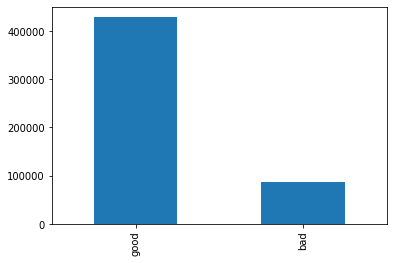

In [10]:
df['review_type'].value_counts().plot(kind='bar')

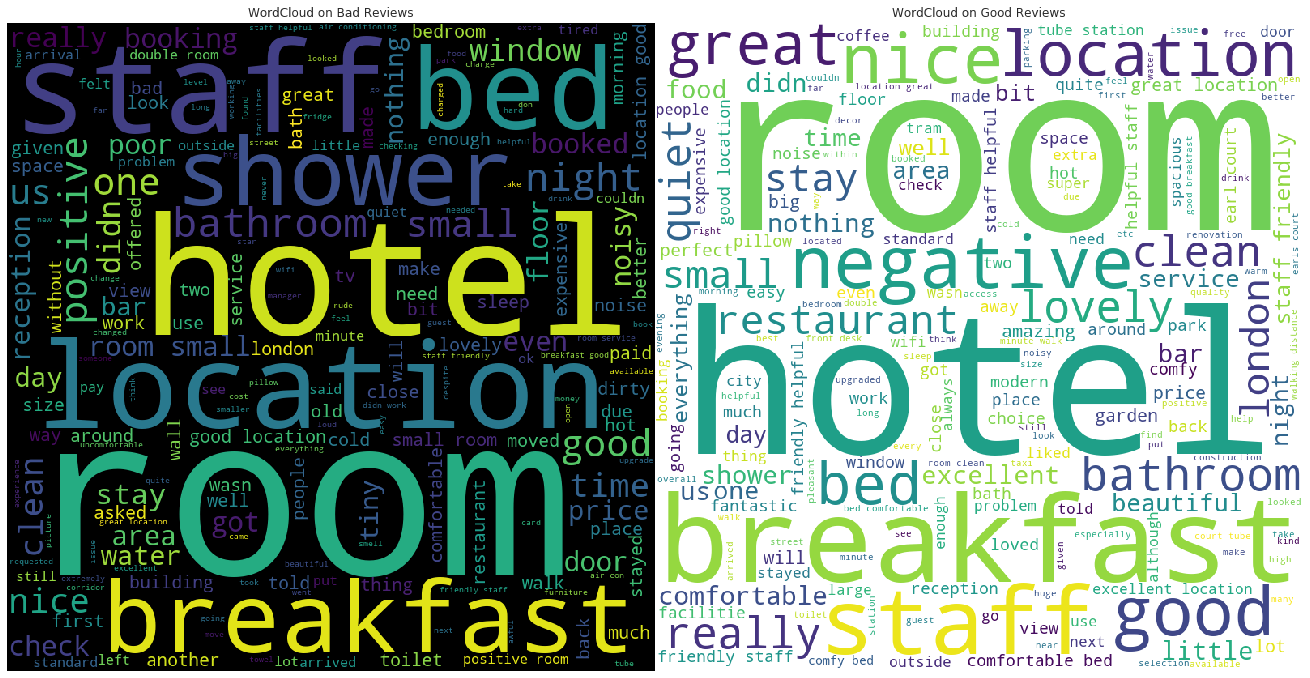

In [11]:
import wordcloud

bad_comment_words = ' '
stopwords = set(wordcloud.STOPWORDS) 
for val in df[df['review_type']=='bad']['review'][:1000]:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  for word in tokens:
    bad_comment_words = bad_comment_words + word + ' '

wordcloud1 = wordcloud.WordCloud(width=800, height=800, background_color='black',
                                stopwords = stopwords, min_font_size=10).generate(bad_comment_words)

good_comment_words = ' '
stopwords = set(wordcloud.STOPWORDS) 
for val in df[df['review_type']=='good']['review'][:1000]:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  for word in tokens:
    good_comment_words = good_comment_words + word + ' '

wordcloud2 = wordcloud.WordCloud(width=800, height=800, background_color='white',
                                stopwords = stopwords, min_font_size=10).generate(good_comment_words)                                

import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(18,10), facecolor=None)
plt.subplot(1,2,1)
plt.imshow(wordcloud1, interpolation='nearest')
plt.axis('off')
plt.title('WordCloud on Bad Reviews')
plt.tight_layout(pad=0)

plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation='nearest')
plt.axis('off')
plt.title('WordCloud on Good Reviews')
plt.tight_layout(pad=0)

plt.show()

In [0]:
good_reviews = df[df['review_type']=='good']
bad_reviews = df[df['review_type']=='bad']

(173702, 2)


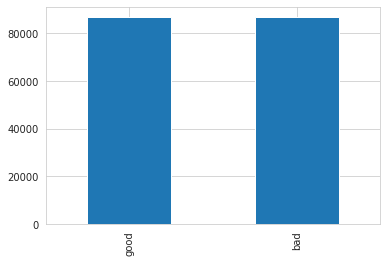

In [13]:
good_df = good_reviews.sample(n=len(bad_reviews),random_state=2020)
bad_df = bad_reviews 
review_df = good_df.append(bad_df).reset_index(drop=True)
print(review_df.shape)
review_df['review_type'].value_counts().plot(kind='bar')

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical 
le = LabelEncoder().fit(review_df.review_type)

def encode(label, le):
  return to_categorical(le.transform(label))

def decode(one_hot, le):
  n = np.argmax(one_hot, axis=1)
  return le.classes_[n]

# encode(review_df.review_type.values, le)
# decode(encode(review_df.review_type.values, le), le)

#type_one_hot = OneHotEncoder(sparse=False).fit_transform(review_df.review_type.values.reshape(-1,1))

type_one_hot = encode(review_df.review_type.values, le)

In [0]:
from sklearn.model_selection import train_test_split 
train_reviews, test_reviews, y_train, y_test = train_test_split(
    review_df.review,
    type_one_hot,
    test_size=.1,
    random_state=2020
)

In [16]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
emb = hub.load(module_url)

print(f"{module_url} has been loaded.")

https://tfhub.dev/google/universal-sentence-encoder-large/5 has been loaded.


In [17]:
def embed(input):
  return emb(tf.cast(input,tf.string))

word = 'Aritifical Intelligence'
sentence = 'Artificial Intelligence is the future.'
paragraph = (" A computer program is said to learn from task T with performance measure P and with experience E if its performance on task T with respect perofrmance measure P improves with experience E.")

messages = [word, sentence, paragraph]

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings)):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      str(x) for x in message_embedding[:3]
  )
  print("Embedding: [{},...]".format(message_embedding_snippet))

Message: Aritifical Intelligence
Embedding size: 512
Embedding: [0.05702079, 0.039626207, 0.016676825,...]
Message: Artificial Intelligence is the future.
Embedding size: 512
Embedding: [0.068350114, -0.0090893535, 0.042877108,...]
Message:  A computer program is said to learn from task T with performance measure P and with experience E if its performance on task T with respect perofrmance measure P improves with experience E.
Embedding size: 512
Embedding: [-0.045430243, 0.015154738, 0.041092098,...]


In [18]:
X_train = []
for r in tqdm(train_reviews):
  emb_r = embed([r])
  review_emb = tf.reshape(emb_r, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_reviews):
  emb_r = embed([r])
  review_emb = tf.reshape(emb_r, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 17371/17371 [06:59<00:00, 41.36it/s]


In [19]:
print(X_train.shape)
print(X_test.shape)

(156331, 512)
(17371, 512)


In [0]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(2048,
                   input_shape=(X_train.shape[1],),
                   activation='relu'
                   )
)

model.add(
    tf.keras.layers.Dropout(0.5)
)

model.add(
    tf.keras.layers.Dense(1024,
                          activation='relu')
)

model.add(
    tf.keras.layers.Dropout(0.5)
)

model.add(
    tf.keras.layers.Dense(2, activation='softmax')
)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2050      
Total params: 3,150,850
Trainable params: 3,150,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import *
from IPython.display import clear_output, display

class PlotLearning(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.loss = []
    self.val_loss = []
    self.acc = []
    self.val_acc = []
    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}): 
    self.logs.append(logs)
    self.x.append(self.i)
    self.loss.append(logs.get('loss'))
    self.acc.append(logs.get('accuracy'))
    self.val_loss.append(logs.get('val_loss'))        
    self.val_acc.append(logs.get('val_accuracy'))
    self.i += 1
    f, ax = plt.subplots(1, 2, figsize=(18,10), sharex=True)
    ax = ax.flatten()
    clear_output(wait=True)
    ax[0].plot(self.x, self.loss, label="Binary Cross Entropy", lw=2)
    ax[0].plot(self.x, self.val_loss, label="Val Binary Cross Entropy")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].plot(self.x, self.acc, label="Accuracy", lw=2)
    ax[1].plot(self.x, self.val_acc, label="Val Accuracy")
    ax[1].legend()
    ax[1].grid(True)
    plt.show();

reduce_lr = ReduceLROnPlateau(monitor="val_loss",factor=0.3,patience=3,verbose=1,mode="auto",min_lr=0.000001)
checkpoint = ModelCheckpoint("base_clf.h5",monitor="val_loss",verbose=1,save_best_only=True,mode="auto")
early_stopping = EarlyStopping(monitor="val_loss",patience=6,mode="auto")
plotLoss = PlotLearning()

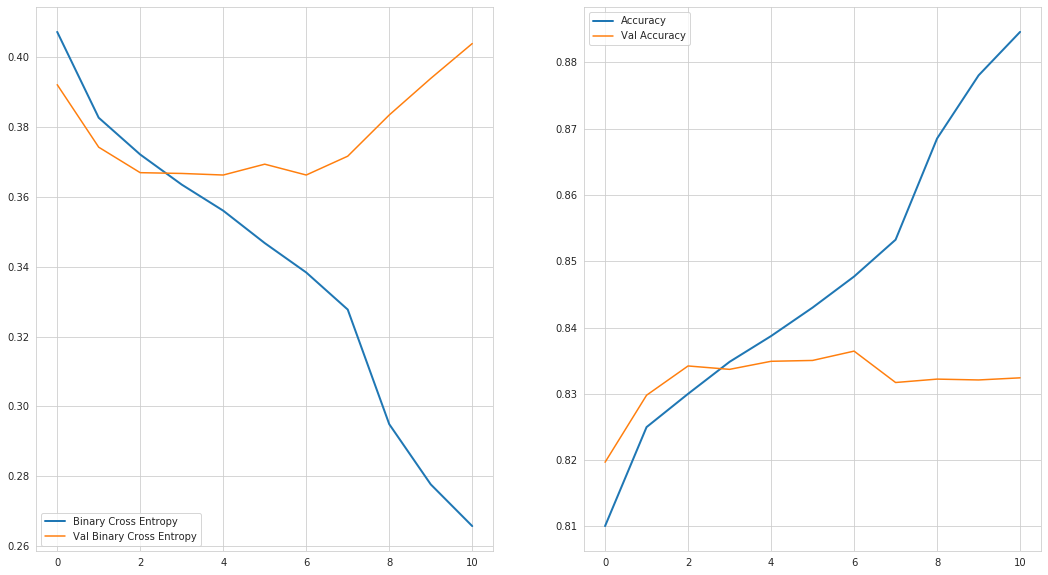

140697/140697 [==============================] - 4s 25us/sample - loss: 0.2658 - accuracy: 0.8846 - val_loss: 0.4039 - val_accuracy: 0.8324


In [30]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=256,
    validation_split=0.1,
    verbose=1,
    shuffle=True,
    callbacks=[reduce_lr, checkpoint, early_stopping, plotLoss]
)

In [32]:
model.evaluate(X_test, y_test)

17371/17371 [==============================] - 1s 83us/sample - loss: 0.4082 - accuracy: 0.8292


[0.4082206575650638, 0.82919806]

In [0]:
preds = model.predict(X_test)

In [0]:
preds = np.argmax(preds, axis=1)

In [0]:
y_test = np.argmax(y_test,axis=1)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(preds, y_test)

Accuracy: 82.92%


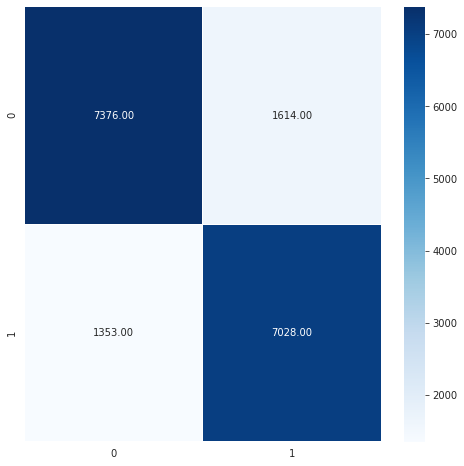

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='.2f', cmap='Blues',linewidth=0.1)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, preds)*100))